# Course 4329 - short R review 

### Install packages:

In [1]:
install.packages('dplyr')

#### Load packages

In [3]:
library(dplyr)

##### Get help

In [4]:
?dplyr

##### Working through an example

#### Load the  Monthly and Quarterly Databases for Macroeconomic Research from the Federal Reserve

In [5]:
data = read.csv('https://files.stlouisfed.org/files/htdocs/fred-databases/monthly/current.csv')

##### The first row is useless, drop it using subsetting
also just keep the first 10 columns/variables

In [6]:
head(data)

sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,⋯,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
Transform:,5.000,5.0,5.000,5.0,5.00,5.0000,5.0000,5.0000,5.0000,⋯,6.000,6.00,6.00,6.00,2.0,6.0,6,6,6.0000,1
1/1/1959,2289.932,2151.8,18.191,255861.9,18234.44,22.7253,23.6124,22.3645,32.4403,⋯,12.133,2.13,2.45,2.04,NA,274.9,6476,12298,84.2043,NA
2/1/1959,2299.790,2160.4,18.380,257783.6,18368.22,23.1703,23.9311,22.5582,32.6782,⋯,12.149,2.13,2.46,2.05,NA,276.0,6476,12298,83.5280,NA
3/1/1959,2314.456,2176.2,18.555,256866.4,18521.70,23.5041,24.0760,22.6689,32.6782,⋯,12.169,2.15,2.45,2.07,NA,277.4,6508,12349,81.6405,NA
4/1/1959,2328.668,2190.7,18.488,262043.8,18533.11,24.0048,24.4237,23.0011,33.1937,⋯,12.211,2.16,2.47,2.08,NA,278.1,6620,12484,81.8099,NA
5/1/1959,2342.767,2205.7,18.710,263871.7,18678.30,24.3664,24.6265,23.2225,33.3524,⋯,12.230,2.17,2.48,2.08,95.3,280.1,6753,12646,80.7315,NA


In [7]:
data = data[-1, 1:10]
# Same as
# data <- data = data[-1, 1:10]
head(data)

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD
2,1/1/1959,2289.932,2151.8,18.191,255861.9,18234.44,22.7253,23.6124,22.3645,32.4403
3,2/1/1959,2299.790,2160.4,18.380,257783.6,18368.22,23.1703,23.9311,22.5582,32.6782
4,3/1/1959,2314.456,2176.2,18.555,256866.4,18521.70,23.5041,24.0760,22.6689,32.6782
5,4/1/1959,2328.668,2190.7,18.488,262043.8,18533.11,24.0048,24.4237,23.0011,33.1937
6,5/1/1959,2342.767,2205.7,18.710,263871.7,18678.30,24.3664,24.6265,23.2225,33.3524
7,6/1/1959,2350.325,2212.8,18.779,263840.0,18848.37,24.3942,24.8003,23.3886,33.1938


Note: the two assignment operators (`=` and `<-`) are equivalent*

\* (except when used in a function call)

#### Convert the date string column to a date variable

In [8]:
data$sasdate = as.Date(data$sasdate, '%d/%m/%Y')
head(data)

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD
2,1959-01-01,2289.932,2151.8,18.191,255861.9,18234.44,22.7253,23.6124,22.3645,32.4403
3,1959-01-02,2299.790,2160.4,18.380,257783.6,18368.22,23.1703,23.9311,22.5582,32.6782
4,1959-01-03,2314.456,2176.2,18.555,256866.4,18521.70,23.5041,24.0760,22.6689,32.6782
5,1959-01-04,2328.668,2190.7,18.488,262043.8,18533.11,24.0048,24.4237,23.0011,33.1937
6,1959-01-05,2342.767,2205.7,18.710,263871.7,18678.30,24.3664,24.6265,23.2225,33.3524
7,1959-01-06,2350.325,2212.8,18.779,263840.0,18848.37,24.3942,24.8003,23.3886,33.1938


#### Plot one of the series
again, choose a subset (`[...]`), but with a vector (`c(...)`)

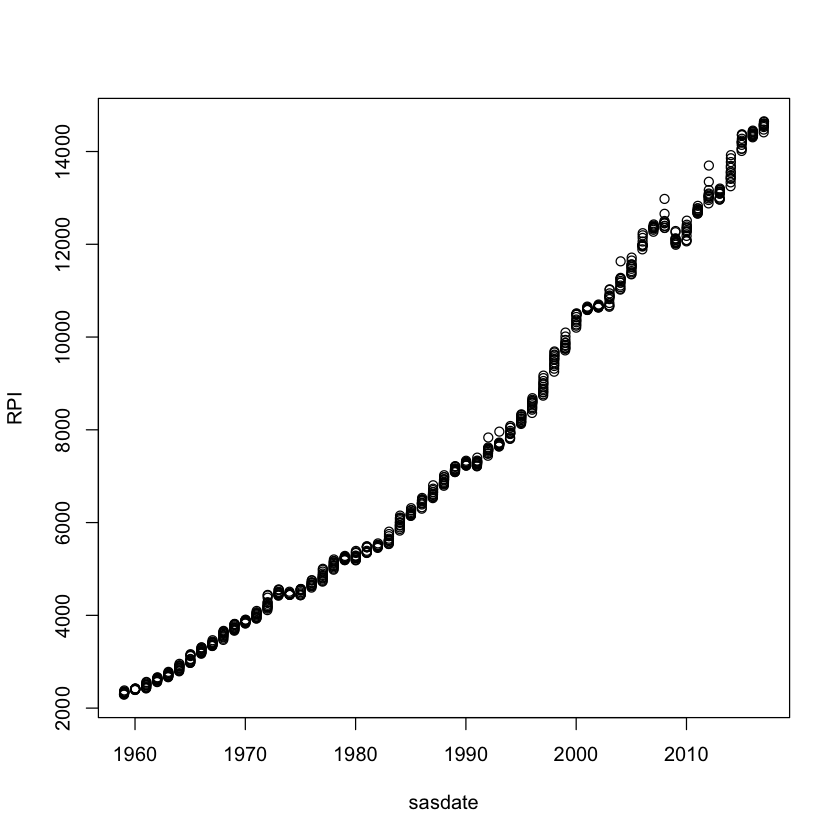

In [9]:
plot(data[c('sasdate', 'RPI')])

##### Regress `RPI` on the `W875RX1` series( 3rd column)

In [10]:
reg = lm(RPI ~ W875RX1, data)
summary(reg)


Call:
lm(formula = RPI ~ W875RX1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-347.33  -89.90   -3.71   83.45  468.31 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.898e+02  1.352e+01  -36.22   <2e-16 ***
W875RX1      1.235e+00  1.894e-03  651.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 150.5 on 705 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9983,	Adjusted R-squared:  0.9983 
F-statistic: 4.247e+05 on 1 and 705 DF,  p-value: < 2.2e-16


#### extract the coefficients

In [11]:
coef(reg)

(Intercept)     W875RX1 
-489.847772    1.234605

#### Regress RPI on all of the colums, and look at the R square

In [13]:
variables = colnames(data)[-(1:2)]
variables

[1] "W875RX1"         "DPCERA3M086SBEA" "CMRMTSPLx"       "RETAILx"        
[5] "INDPRO"          "IPFPNSS"         "IPFINAL"         "IPCONGD"

#### use `lapply` to apply a function to all these variable names

lapply applies a function to every element in a list/vector, and returns a list

In [14]:
regressions = lapply(variables, function(x)
                        lm(as.formula(paste('RPI ~ ', x)), data))

In [15]:
regressions[[1]]


Call:
lm(formula = as.formula(paste("RPI ~ ", x)), data = data)

Coefficients:
(Intercept)      W875RX1  
   -489.848        1.235  


#### The R squares

In [16]:
rsquares = lapply(regressions, function(x) summary(x)$r.squared)
rsquares

[[1]]
[1] 0.9983428

[[2]]
[1] 0.9984997

[[3]]
[1] 0.9890817

[[4]]
[1] 0.9880018

[[5]]
[1] 0.9689553

[[6]]
[1] 0.9330966

[[7]]
[1] 0.9451723

[[8]]
[1] 0.8836999

#### In a more readable output

In [17]:
cbind(Rsq = rsquares, name = variables)

Rsq,name
0.9983428,W875RX1
0.9984997,DPCERA3M086SBEA
0.9890817,CMRMTSPLx
0.9880018,RETAILx
0.9689553,INDPRO
0.9330966,IPFPNSS
0.9451723,IPFINAL
0.8836999,IPCONGD


#### Could also have used a loop

In [18]:
rsquares = matrix(0, nrow = 8)
i = 1

for (name in variables) {
    reg = lm(as.formula(paste('RPI ~ ', name)), data)
    rsquares[i] = summary(reg)$r.squared
    i = i + 1
}

In [19]:
rsquares

0.9983428
0.9984997
0.9890817
0.9880018
0.9689553
0.9330966
0.9451723
0.8836999


#### That was just a quick refresher

#### Other resources

Help sites

[Stackoverflow](stackoverflow.com)

[Stats stack exchange](https://stats.stackexchange.com)


An alternative to typset your homework

[Markdown and knir](http://rmarkdown.rstudio.com/articles_intro.html)

Free books

[The Art of R Programming](http://heather.cs.ucdavis.edu/~matloff/132/NSPpart.pdf)

[R for Data Science](http://r4ds.had.co.nz/) (More "modern"/add-ons aspects of R)

Misc

[Google R Style Guide](https://google.github.io/styleguide/Rguide.xml)